# Introduction:

1. create the `w_axis` and `t_axis`;
2. create the separable spectrum;
3. generate simulations

In [1]:
import sys

In [2]:
sys.path.append("/Users/lesliec/Documents/Github_repos/ktnsrm/src/ktnsrm")

In [3]:
from KT_model import *
from SpecRepMethod import *
from functools import partial
from utils import EPSD_show, specgram3d
from KT import KT

import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib widget

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
# set up a global plt style for the script
plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        })

In [7]:
# instantiate simulation object
simulation_obj = SRM(wu=100, N1=1024, fs=200, duration=8)

In [8]:
# Take a look at the shape
print("the shape of the w axis:", simulation_obj.w_axis_4simu.shape)
print("the shape of the time axis:", simulation_obj.t_axis_4simu.shape)

the shape of the w axis: (1024,)
the shape of the time axis: (1600,)


## OOP constructor for a Kanai Tajimi model

> Hint: need to specify a `w_axis` at run time

In [9]:
kt_model = KT(wg=5 * np.pi, zzeta = 0.63, S0 = 0.011)

In [10]:
# w_axis = np.arange(-wu, wu, 0.1)

In [11]:
kt_model.get_KT_psd(simulation_obj.w_axis_4simu)

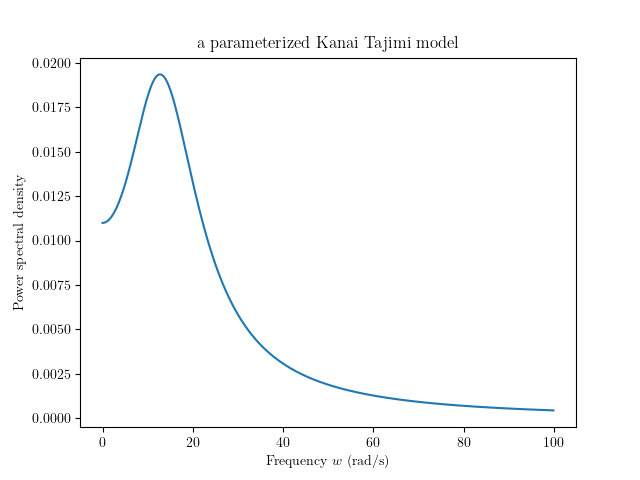

In [12]:
fig, ax = plt.subplots()
ax.plot(simulation_obj.w_axis_4simu, kt_model.KT_PSD)
ax.set_title("a parameterized Kanai Tajimi model")
ax.set_xlabel(r'Frequency $w$ (rad/s)')
ax.set_ylabel('Power spectral density')
plt.show()

**get simulations**

the lower limit of sampling frequency: 32
the length of the simulation (1600,)


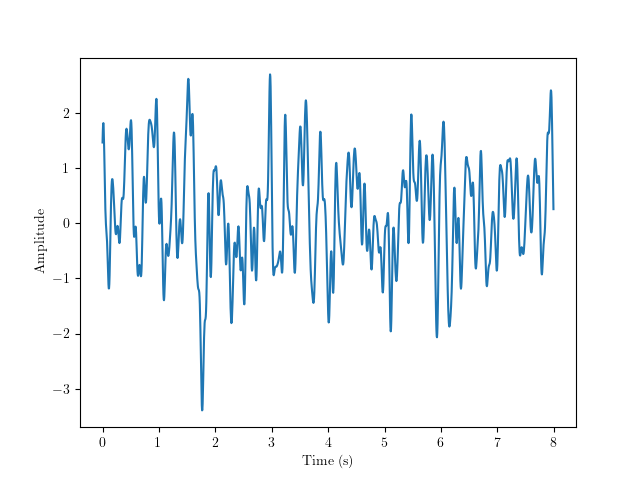

In [13]:
KT_simulation_amp = simulation_obj._SpecRepsentation0(kt_model.KT_PSD, plotting=True)

### A separable non-stationary spectra

In [14]:
kt_model.get_sepEpsd(kt_model.envelop_tfunc1, t_axis=simulation_obj.t_axis_4simu)

the shape of the nonstationary spectra$S_{wt}$ (1024, 1600)


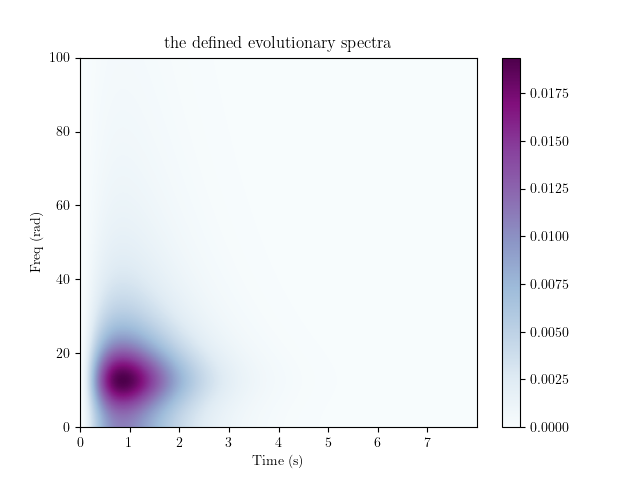

In [15]:
kt_model.EPSD_display(
    kt_model._sepEPSD, simulation_obj.w_axis_4simu, simulation_obj.t_axis_4simu, 
    format='2d',)

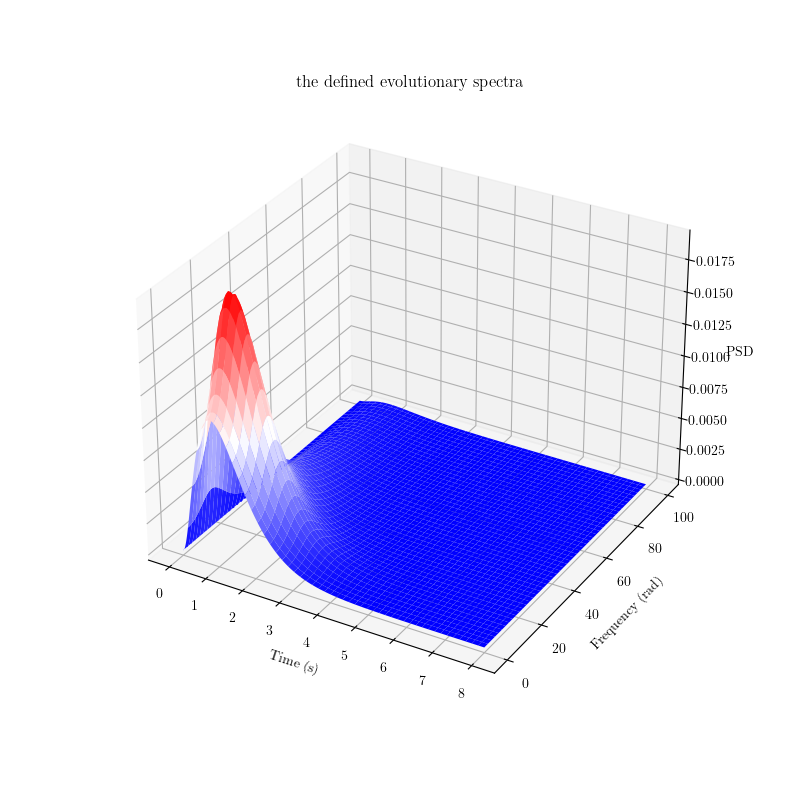

In [16]:
kt_model.EPSD_display(
    kt_model._sepEPSD, simulation_obj.w_axis_4simu, simulation_obj.t_axis_4simu, 
    format='3d',)

the lower limit of sampling frequency: 32
the length of the simulation (1600,)


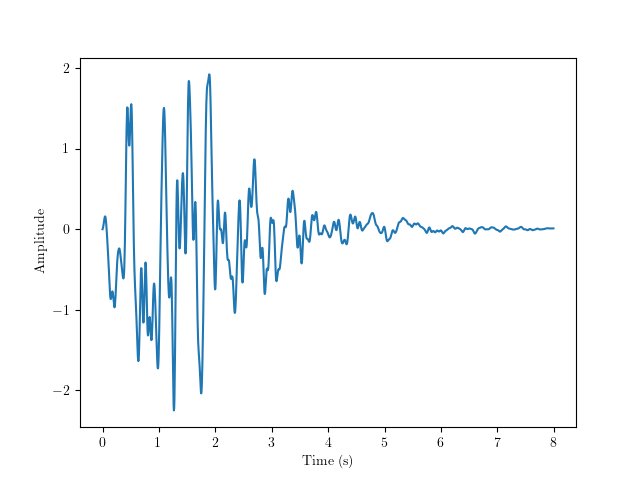

In [18]:
a_nonsta_simulation = simulation_obj._SpecRepsentation0(kt_model._sepEPSD, plotting=True)

### A non-separable non-stationary spectra

In [19]:
nonsepEPSD = kt_model.nonsepEpsd(simulation_obj.w_axis_4simu, simulation_obj.t_axis_4simu)

In [20]:
nonsepEPSD.shape

(1024, 1600)

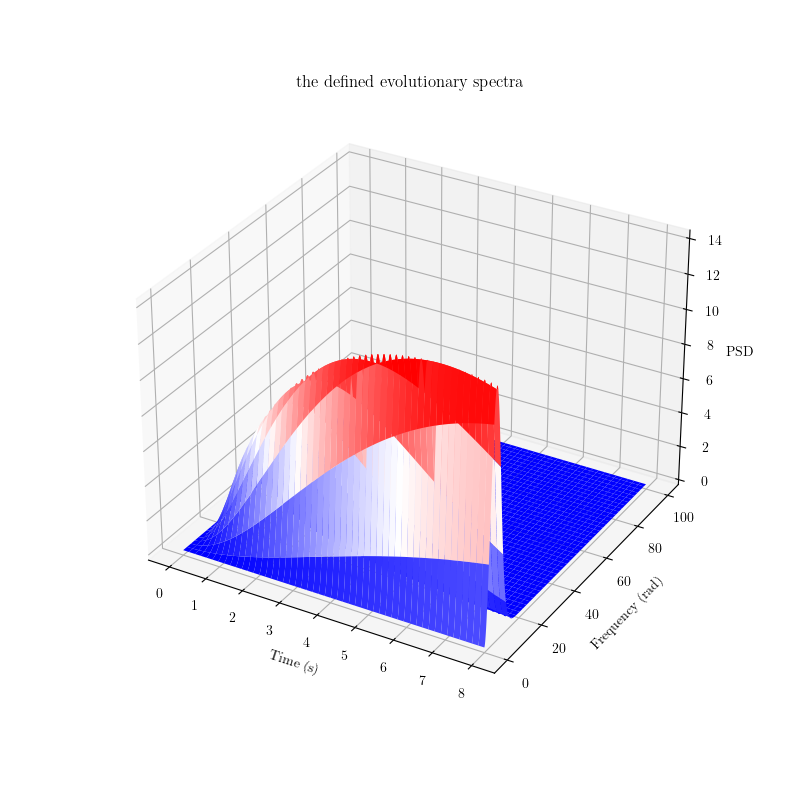

In [21]:
kt_model.EPSD_display(
    nonsepEPSD, 
    simulation_obj.w_axis_4simu, 
    simulation_obj.t_axis_4simu, 
    format='3d',)